# Fundamentals of Machine Learning

### Loading Libraries

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

# TensorFlow Datasets
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.datasets import boston_housing

# Math Computing
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# Copy
import copy

##### Loading Data

In [12]:
# Setting data and shaping it as follow:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Adding noise
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

##### Model Training

In [13]:
# Training the same model on MNIST data with noise channels or all-zero channels
def get_model():
    # Setting Model Structure
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    # Compiling procedure:
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.6206 - accuracy: 0.8135 - val_loss: 0.2961 - val_accuracy: 0.9093
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2520 - accuracy: 0.9232 - val_loss: 0.1955 - val_accuracy: 0.9427
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1627 - accuracy: 0.9500 - val_loss: 0.1476 - val_accuracy: 0.9557
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1163 - accuracy: 0.9643 - val_loss: 0.1425 - val_accuracy: 0.9563
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9738 - val_loss: 0.1247 - val_accuracy: 0.9639
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9794 - val_loss: 0.1267 - val_accuracy: 0.9647
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.1445 - val_accuracy: 0.9610
Epoch 

##### Plotting & comparing validation accuracy 

[]

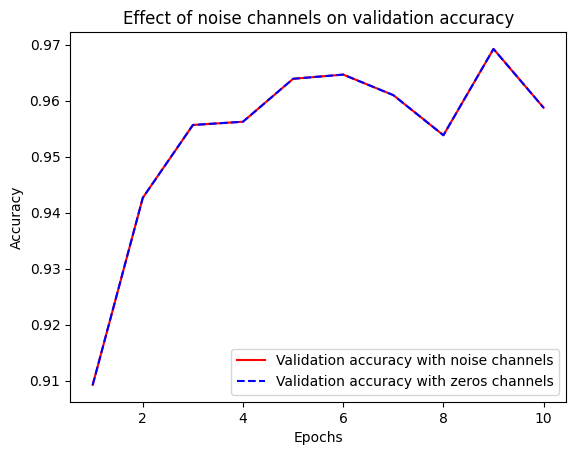

In [18]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_noise.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "r-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.plot()

#### The nature of generalization in deep learning

In [19]:
# Fitting MNIST model with randimly shuffled labels
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [20]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3169 - accuracy: 0.0995 - val_loss: 2.3077 - val_accuracy: 0.1093
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3005 - accuracy: 0.1158 - val_loss: 2.3140 - val_accuracy: 0.1013
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2910 - accuracy: 0.1271 - val_loss: 2.3203 - val_accuracy: 0.1038
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2761 - accuracy: 0.1426 - val_loss: 2.3271 - val_accuracy: 0.1032
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2592 - accuracy: 0.1536 - val_loss: 2.3387 - val_accuracy: 0.1027
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2368 - accuracy: 0.1696 - val_loss: 2.3508 - val_accuracy: 0.1082
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2145 - accuracy: 0.1823 - val_loss: 2.3650 - val_accuracy: 0.1048

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9405 - accuracy: 0.6888 - val_loss: 4.6295 - val_accuracy: 0.1044
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9228 - accuracy: 0.6938 - val_loss: 4.7073 - val_accuracy: 0.1058
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9111 - accuracy: 0.6973 - val_loss: 4.8084 - val_accuracy: 0.1021
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8941 - accuracy: 0.7053 - val_loss: 4.8363 - val_accuracy: 0.1028
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8822 - accuracy: 0.7101 - val_loss: 4.9088 - val_accuracy: 0.1013
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8665 - accuracy: 0.7143 - val_loss: 4.9551 - val_accuracy: 0.1058
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8545 - accuracy: 0.7172 - val_loss: 4.9906 - val_accuracy:

### Evaluationg Machine Learning Models

#### Training, validation & test sets

##### Simple Holdout Validation

In [24]:
# Holdout validation (note that labels are omitted for simplicity)

'''
num_validation_samples = 10000
np.random.shuffle(data)

# Defining Validation set
validation_data = data[:num_validation_samples]
# Setting train set
training_data = data[num_validation_samples:]
model = get_model()
# Model Training
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data,..)

...

model = get_model()
model.fit(np.concatenate([training_data,
                            validation_data]), ...)

test_score = model.evaluate(test_data, ...)
'''

'\nnum_validation_samples = 10000\nnp.random.shuffle(data)\n\n# Defining Validation set\nvalidation_data = data[:num_validation_samples]\n# Setting train set\ntraining_data = data[num_validation_samples:]\nmodel = get_model()\n# Model Training\nmodel.fit(training_data, ...)\nvalidation_score = model.evaluate(validation_data,..)\n\n...\n\nmodel = get_model()\nmodel.fit(np.concatenate([training_data,\n                            validation_data]), ...)\n\ntest_score = model.evaluate(test_data, ...)\n'

##### K-Fold Validation

In [25]:
# k = 3
# num_validation_samples = len(data) // k
# np.random.shuffle(data)
# validation_scores = []

# for fold in range(k):
#     validation_data = data[num_validation_samples * fold:
#                            num_validation_samples * (fold + 1)]
    
#     training_data = np.concatenate(
#         data[:num_validation_samples *],
#         data[num_validation_samples * (fold + 1) :])
    
#     model = get_model()
#     model.fit(training_data, ...)
#     validation_score = model.evaluate(validation_data, ...)
#     validation_scores.append(validation_score)
# validation_score = np.average(validation_scores)
# model = get_model()
# model.fit(data, ...)
# test_score = model.evaluate(test_data, ...)

### Improving Model Fit

#### Tuning Key Gradient Descent Parameters

In [26]:
# Training with inappropiately large learning rate as follow:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [27]:
# Setting Model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [30]:
# Compiling model
from tensorflow.keras.optimizers import legacy

model.compile(optimizer=legacy.RMSprop(lr=1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 766.2747 - accuracy: 0.3504 - val_loss: 2.3370 - val_accuracy: 0.2693
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 4.0160 - accuracy: 0.2612 - val_loss: 3.1786 - val_accuracy: 0.2612
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 3.2278 - accuracy: 0.2459 - val_loss: 2.2493 - val_accuracy: 0.2604
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.9371 - accuracy: 0.2585 - val_loss: 2.3474 - val_accuracy: 0.2851
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 2.5447 - accuracy: 0.2591 - val_loss: 2.3564 - val_accuracy: 0.3272
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 2.7541 - accuracy: 0.2596 - val_loss: 2.3719 - val_accuracy: 0.2772
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6446 - accuracy: 0.2573 - val_loss: 2.3103 - val_accuracy: 0.2322
Epoc

##### With an appropiate Learning Rate

In [33]:
# Re-setting a Well trained model set-up
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling model

model.compile(optimizer=legacy.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Fitting Model
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.9129 - val_loss: 0.1858 - val_accuracy: 0.9528
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1451 - accuracy: 0.9640 - val_loss: 0.1625 - val_accuracy: 0.9615
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9732 - val_loss: 0.1703 - val_accuracy: 0.9677
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1013 - accuracy: 0.9776 - val_loss: 0.1758 - val_accuracy: 0.9739
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9819 - val_loss: 0.2074 - val_accuracy: 0.9727
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9839 - val_loss: 0.2216 - val_accuracy: 0.9706
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9865 - val_loss: 0.2499 - val_accuracy: 0.9711
Epoch 

#### Increasing Model Capacity

In [34]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [36]:
history_small_model = model.fit(train_images, train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 0s 553us/step - loss: 0.6686 - accuracy: 0.8371 - val_loss: 0.3613 - val_accuracy: 0.9034
Epoch 2/20
375/375 [==============================] - 0s 371us/step - loss: 0.3512 - accuracy: 0.9031 - val_loss: 0.3077 - val_accuracy: 0.9154
Epoch 3/20
375/375 [==============================] - 0s 377us/step - loss: 0.3154 - accuracy: 0.9126 - val_loss: 0.2895 - val_accuracy: 0.9195
Epoch 4/20
375/375 [==============================] - 0s 376us/step - loss: 0.2993 - accuracy: 0.9165 - val_loss: 0.2814 - val_accuracy: 0.9214
Epoch 5/20
375/375 [==============================] - 0s 382us/step - loss: 0.2895 - accuracy: 0.9188 - val_loss: 0.2765 - val_accuracy: 0.9228
Epoch 6/20
375/375 [==============================] - 0s 375us/step - loss: 0.2829 - accuracy: 0.9207 - val_loss: 0.2716 - val_accuracy: 0.9262
Epoch 7/20
375/375 [==============================] - 0s 391us/step - loss: 0.2779 - accuracy: 0.9226 - val_loss: 0.2683 - val_accuracy:

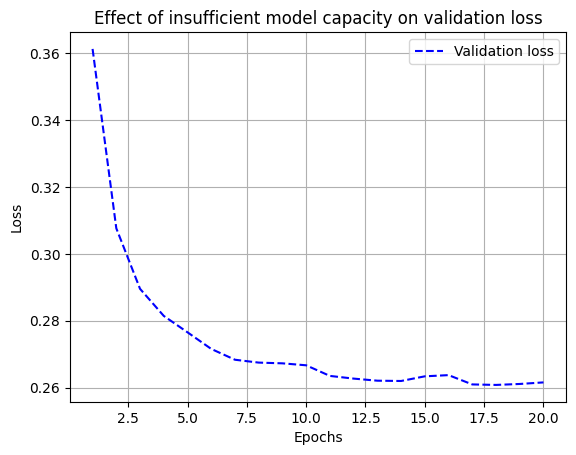

In [41]:
# Getting Loss curve as follow:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [42]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

# Compiling model
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Fitting model
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 0s 931us/step - loss: 0.3694 - accuracy: 0.8948 - val_loss: 0.1892 - val_accuracy: 0.9453
Epoch 2/20
375/375 [==============================] - 0s 768us/step - loss: 0.1661 - accuracy: 0.9509 - val_loss: 0.1598 - val_accuracy: 0.9528
Epoch 3/20
375/375 [==============================] - 0s 769us/step - loss: 0.1185 - accuracy: 0.9645 - val_loss: 0.1267 - val_accuracy: 0.9618
Epoch 4/20
375/375 [==============================] - 0s 820us/step - loss: 0.0906 - accuracy: 0.9728 - val_loss: 0.1230 - val_accuracy: 0.9633
Epoch 5/20
375/375 [==============================] - 0s 832us/step - loss: 0.0721 - accuracy: 0.9781 - val_loss: 0.0913 - val_accuracy: 0.9732
Epoch 6/20
375/375 [==============================] - 0s 813us/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0937 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 0s 787us/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.1084 - val_accuracy:

### Improve Generalization

#### Regularizing the model

##### reducing the network size

In [49]:
# Original Model as follow:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [50]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [51]:
# Setting model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [52]:
# Compiling model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [53]:
# Fitting model as follow:
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.4924 - accuracy: 0.7947 - val_loss: 0.3622 - val_accuracy: 0.8760
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.9075 - val_loss: 0.3232 - val_accuracy: 0.8710
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9293 - val_loss: 0.3149 - val_accuracy: 0.8720
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1662 - accuracy: 0.9467 - val_loss: 0.2770 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1374 - accuracy: 0.9551 - val_loss: 0.2862 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1111 - accuracy: 0.9658 - val_loss: 0.3095 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0912 - accuracy: 0.9731 - val_loss: 0.3620 - val_accuracy: 0.8733
Epoch 8/20
30/30 [=

In [54]:
# Lower capacity model version as follow:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Fitting model
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.6316 - accuracy: 0.6638 - val_loss: 0.5903 - val_accuracy: 0.7709
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5543 - accuracy: 0.7785 - val_loss: 0.5500 - val_accuracy: 0.7400
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.8261 - val_loss: 0.5171 - val_accuracy: 0.8287
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8603 - val_loss: 0.4963 - val_accuracy: 0.8301
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.8859 - val_loss: 0.4860 - val_accuracy: 0.8259
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.9022 - val_loss: 0.4782 - val_accuracy: 0.8321
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.9176 - val_loss: 0.4574 - val_accuracy: 0.8698
Epoch 8/20
30/30 [=

In [55]:
# Higher capacity model version as follow:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Fitting larger model
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5173 - accuracy: 0.7668 - val_loss: 0.7197 - val_accuracy: 0.7031
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2793 - accuracy: 0.8866 - val_loss: 0.2755 - val_accuracy: 0.8911
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1604 - accuracy: 0.9453 - val_loss: 0.2783 - val_accuracy: 0.8920
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0863 - accuracy: 0.9718 - val_loss: 0.3707 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1249 - accuracy: 0.9755 - val_loss: 0.3273 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0065 - accuracy: 0.9995 - val_loss: 0.5023 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 9.8661e-04 - accuracy: 0.9999 - val_loss: 0.6192 - val_accuracy: 0.8865
Epoch 8/2

##### Adding weight regulatization

In [58]:
# Adding L2 weight regularization to the model, as follow:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Fitting model
history_l2_reg = model.fit(train_data, train_labels,
                           epochs=20,
                           batch_size=512,
                           validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5966 - accuracy: 0.7838 - val_loss: 0.4626 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8984 - val_loss: 0.3873 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.9165 - val_loss: 0.3627 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.9263 - val_loss: 0.3553 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.9341 - val_loss: 0.3532 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2590 - accuracy: 0.9387 - val_loss: 0.3560 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.9432 - val_loss: 0.3879 - val_accuracy: 0.8745
Epoch 8/20
30/30 [=

In [60]:
# Different weight regularizers available in Keras

# L1 regularizer
regularizers.l1(0.001)
# L2 regularizer
regularizers.l1_l2(l1=0.001, l2=0.001)

##### Adding DropOut

In [65]:
# Adding dropout to the IMDB model, as follow
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Fitting model
history_dropout = model.fit(train_data, train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6342 - accuracy: 0.6273 - val_loss: 0.5240 - val_accuracy: 0.8470
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.7533 - val_loss: 0.4311 - val_accuracy: 0.8551
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.8140 - val_loss: 0.3636 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.8553 - val_loss: 0.3256 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3411 - accuracy: 0.8801 - val_loss: 0.2997 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2973 - accuracy: 0.8985 - val_loss: 0.2858 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2624 - accuracy: 0.9161 - val_loss: 0.2839 - val_accuracy: 0.8921
Epoch 8/20
30/30 [=